Data cleaning

In [1]:
import pandas as pd


In [5]:
#file imported from Git
df=pd.read_csv('https://raw.githubusercontent.com/LinkedInLearning/data_cleaning_python_2883183/main/Ch01/01_02/cart.csv', parse_dates=['date'])

In [6]:
df

,date,name,amount,price
0,2021-03-01,carrot,7.0,5.73
1,2021-03-01,egg,12.0,1.70
2,2021-03-01,milk,NaN,3.57
3,2021-03-01,potato,2.0,NaN
4,NaT,tomato,6.0,1.52
5,2021-03-02,potato,3.0,2.17
6,2021-03-03,NaN,5.0,3.68


In [9]:
df.dtypes
#amount is converted to a float by pandas bcos it has no expression for missing integer.
df['amount'].astype('Int32')

0       7
1      12
2    <NA>
3       2
4       6
5       3
6       5
Name: amount, dtype: Int32

In [22]:
#df.isnull()
df.isnull().any(axis=1)

0    False
1    False
2     True
3     True
4     True
5    False
6     True
dtype: bool

Bad values

In [26]:
df=pd.read_csv('https://raw.githubusercontent.com/LinkedInLearning/data_cleaning_python_2883183/main/Ch01/01_03/metrics.csv', parse_dates=['time'])
df.sample(10)

,time,name,value
62,2021-07-13 14:37:22.047,cpu,3.095000e+01
93,2021-07-13 14:37:36.402,mem,2.274931e+08
77,2021-07-13 14:37:28.746,mem,2.275121e+08
23,2021-07-13 14:37:02.907,mem,2.275231e+08
25,2021-07-13 14:37:03.864,mem,2.275177e+08
75,2021-07-13 14:37:27.789,mem,2.274959e+08
0,2021-07-13 14:36:52.380,mem,2.275172e+08
60,2021-07-13 14:37:21.090,mem,2.275347e+08
4,2021-07-13 14:36:54.294,mem,2.275157e+08
13,2021-07-13 14:36:58.122,cpu,3.233000e+01


In [38]:
#overview of data to scan for bad value
df.groupby('name').describe()
df['name'].value_counts()

mem    50
cpu    49
CPU     1
Name: name, dtype: int64

array([<AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>,
       <AxesSubplot:xlabel='time'>], dtype=object)

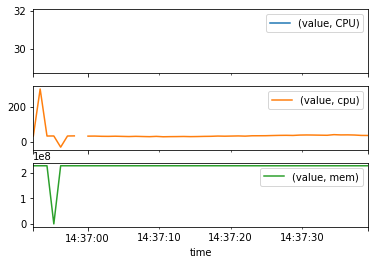

In [29]:
#visualizing for bad value
pd.pivot(df, index='time', columns='name').plot(subplots=True)

In [30]:
#querying a column with a particular variable and limits to check for outliers
df.query('name == "cpu" & (value < 0 | value > 100)')

,time,name,value
3,2021-07-13 14:36:53.337,cpu,300.90
9,2021-07-13 14:36:56.208,cpu,-32.14


In [39]:
#z-score to check for outliers
mem = df[df['name'] == 'mem']['value']
z_score = (mem - mem.mean())/mem.std()
bad_mem = mem[z_score.abs() > 2]
df.loc[bad_mem.index]

,time,name,value
6,2021-07-13 14:36:55.251,mem,295.0


Duplicates

In [41]:
df = pd.read_csv('https://raw.githubusercontent.com/LinkedInLearning/data_cleaning_python_2883183/main/Ch01/01_04/cart.csv', parse_dates=['date'])
df

,date,name,amount,price
0,2021-03-01,carrot,7,5.73
1,2021-03-01,egg,12,1.70
2,2021-03-01,egg,12,1.20
3,2021-03-01,milk,1,3.57
4,2021-03-02,potato,3,2.17
5,2021-03-02,potato,3,2.17


In [44]:
#fetching duplicate data with and without keys
df.duplicated()
#df.duplicated(['date', 'name'])

0    False
1    False
2    False
3    False
4    False
5     True
dtype: bool

 Finding missing values

In [50]:
df=pd.read_csv('https://raw.githubusercontent.com/LinkedInLearning/data_cleaning_python_2883183/main/Ch03/03_03/ships.csv')

In [51]:
df

,name,lat,lng
0,Black Pearl,20.664865,-80.709747
1,Cobra,20.664868,-80.709740
2,Flying Dutchman,20.664878,-80.709941
3,Empress,NaN,NaN
4,,20.664875,-80.709777


In [54]:
#to find empty 'values' that are not in the format recognized by pandas, strip the empty space and replace with numpy nan
import numpy as np
mask = df['name'].str.strip() == ''
df.loc[mask, 'name'] = np.nan
#df[df.isnull().any(axis=1)]

,name,lat,lng
3,Empress,NaN,NaN
4,NaN,20.664875,-80.709777


Sub group

In [55]:
df=pd.read_csv('https://raw.githubusercontent.com/LinkedInLearning/data_cleaning_python_2883183/main/Ch03/03_05/heights.csv')
df

,name,grade,height
0,Adam,1,31.7
1,Beth,1,74.9
2,Chris,12,72.3
3,Dana,12,61.8


In [58]:
#to filter a sub group for errors, from within a larger group- create a column with the required filter and merge
max_heights = pd.DataFrame([[1, 32]], columns=['grade', 'max_height'])
max_heights

,grade,max_height
0,1,32


In [59]:
mdf = pd.merge(df, max_heights, how='left')
mdf

,name,grade,height,max_height
0,Adam,1,31.7,32.0
1,Beth,1,74.9,32.0
2,Chris,12,72.3,NaN
3,Dana,12,61.8,NaN


In [60]:
#filter out the subgroup 
df[mdf['height'] > mdf['max_height']]

,name,grade,height
1,Beth,1,74.9


In [61]:
df=pd.read_csv('https://raw.githubusercontent.com/LinkedInLearning/data_cleaning_python_2883183/main/Ch03/challenge/rides.csv')
df

,name,plate,distance
0,Gomez,1XZ2,3.70
1,Morticia,NaN,2.10
2,Fester,,3.40
3,Lurch,Q38X3,-3.20
4,NaN,03A,14.30
5,Wednesday,A,0.30
6,Pugsley,ZF003,153.14


In [77]:
# Find out all the rows that have bad values
# - Missing values are not allowed
# - A plate must be a combination of at least 3 upper case letters or digits
# - Distance much be bigger than 0

#rows with missing values
null_mask = df.isnull().any(axis=1)
df[null_mask]

,name,plate,distance
1,Morticia,NaN,2.1
4,NaN,03A,14.3


In [81]:
#to work on a string, .str is used. ~ used to show the content not in the df defined
plate_mask = ~df['plate'].str.match(r'^[0-9A-Z]{3,}', na=False)
df[plate_mask]

,name,plate,distance
1,Morticia,NaN,2.1
2,Fester,,3.4
5,Wednesday,A,0.3


In [79]:
dist_mask = df['distance'] < 0
df[dist_mask]

,name,plate,distance
3,Lurch,Q38X3,-3.2


In [82]:
#merge of all bad rows
mask = null_mask | plate_mask | dist_mask
df[mask]

,name,plate,distance
1,Morticia,NaN,2.1
2,Fester,,3.4
3,Lurch,Q38X3,-3.2
4,NaN,03A,14.3
5,Wednesday,A,0.3


Renaming Fields

In [83]:
df=pd.read_csv('https://raw.githubusercontent.com/LinkedInLearning/data_cleaning_python_2883183/main/Ch05/05_01/weather.csv')
df

,DATE,TMIN,TMAX
0,2021-04-25,18,28
1,2021-04-26,16,23
2,2021-04-27,17,24
3,2021-04-28,15,25
4,2021-04-29,17,28


In [84]:
df.rename(columns={
    'DATE': 'date',
    'TMIN': 'min_temp',
    'TMAX': 'max_temp',
}, inplace=True)
df

,date,min_temp,max_temp
0,2021-04-25,18,28
1,2021-04-26,16,23
2,2021-04-27,17,24
3,2021-04-28,15,25
4,2021-04-29,17,28


In [85]:
df=pd.read_csv('https://raw.githubusercontent.com/LinkedInLearning/data_cleaning_python_2883183/main/Ch05/05_01/donations.csv')
df

,1. First Name,2. Last Name,3. Donation Amount
0,Amy,Wang,200
1,Bender,Rodriguez,12
2,Philip,Fry,70


In [86]:
#another method

import re


def fix_col(col):
    """Fix column name
    >>> fix_col('1. First Name')
    'first_name'
    """
    return (
        re.sub(r'\d+\.\s+', '', col)
        .lower()
        .replace(' ', '_')
    )

df.rename(columns=fix_col, inplace=True)
df

,first_name,last_name,donation_amount
0,Amy,Wang,200
1,Bender,Rodriguez,12
2,Philip,Fry,70


Fixing/changing types

In [124]:
df=pd.read_csv('https://raw.githubusercontent.com/LinkedInLearning/data_cleaning_python_2883183/main/Ch05/05_02/points.csv')
df
df.dtypes

x           int64
y           int64
color      object
visible    object
dtype: object

In [128]:
# define a function and apply 
def asint(val):
    return int(val, base=0)

#df['color'] = df['color'].apply(asint)
#df.dtypes
df

,x,y,color,visible
0,1,1,16711680,yes
1,2,2,65280,no
2,3,3,255,yes


In [131]:
#using a dictionary and map function
bools = {
    'yes': True,
    'no': False,
}
#df['visible'] = df['visible'].map(bools)

df

,x,y,color,visible
0,1,1,16711680,True
1,2,2,65280,False
2,3,3,255,True


In [132]:
df.dtypes

x          int64
y          int64
color      int64
visible     bool
dtype: object

Splitting and Joining

In [180]:
df=pd.read_csv('https://raw.githubusercontent.com/LinkedInLearning/data_cleaning_python_2883183/main/Ch05/05_03/2021-06.csv')
df
#df.dtypes

,day,time,client
0,1,09:00-11:00,ecorp
1,1,12:00-18:00,allsafe
2,2,10:00-19:30,allsafe
3,3,11:30-17:00,ecorp


In [181]:
#append a new column using a csv file named for the day
csv_file='2021-06.csv'
df['date'] = csv_file[:-len('.csv')]
df

,day,time,client,date
0,1,09:00-11:00,ecorp,2021-06
1,1,12:00-18:00,allsafe,2021-06
2,2,10:00-19:30,allsafe,2021-06
3,3,11:30-17:00,ecorp,2021-06


In [182]:
#split a column 
times = df['time'].str.split('-', expand=True)
times.columns = ['start', 'end']
times

,start,end
0,09:00,11:00
1,12:00,18:00
2,10:00,19:30
3,11:30,17:00


In [183]:
#concatenate two dataframes
df = pd.concat([df, times], axis=1)
df

,day,time,client,date,start,end
0,1,09:00-11:00,ecorp,2021-06,09:00,11:00
1,1,12:00-18:00,allsafe,2021-06,12:00,18:00
2,2,10:00-19:30,allsafe,2021-06,10:00,19:30
3,3,11:30-17:00,ecorp,2021-06,11:30,17:00


In [185]:
#convert to datetime to make calculations 
df['start'] = pd.to_datetime(
    df['date'].str.cat(df['start'], sep='T')
)
df['end'] = pd.to_datetime(
    df['date'].str.cat(df['end'], sep='T')
)
df

,day,time,client,date,start,end
0,1,09:00-11:00,ecorp,2021-06,2021-06-01 09:00:00,2021-06-01 11:00:00
1,1,12:00-18:00,allsafe,2021-06,2021-06-01 12:00:00,2021-06-01 18:00:00
2,2,10:00-19:30,allsafe,2021-06,2021-06-01 10:00:00,2021-06-01 19:30:00
3,3,11:30-17:00,ecorp,2021-06,2021-06-01 11:30:00,2021-06-01 17:00:00


In [186]:
(df['end'] - df['start']).sum()

Timedelta('0 days 23:00:00')

Deleting bad data

In [192]:
df=pd.read_csv('https://raw.githubusercontent.com/LinkedInLearning/data_cleaning_python_2883183/main/Ch05/05_04/rides.csv')
df

,name,plate,distance
0,Gomez,1XZ2,3.70
1,Morticia,NaN,2.10
2,Fester,,3.40
3,Lurch,Q38X3,-3.20
4,NaN,03A,14.30
5,Wednesday,A,0.30
6,Pugsley,ZF003,153.14


In [197]:
#creating a mask using eval and using tilda sign to remove bad data
#mask = df.eval('name.isnull() | distance <= 0')
#mask

In [195]:
df = df[~mask]
df

,name,plate,distance
0,Gomez,1XZ2,3.70
6,Pugsley,ZF003,153.14


Filling missing values

In [196]:
df=pd.read_csv('https://raw.githubusercontent.com/LinkedInLearning/data_cleaning_python_2883183/main/Ch05/05_05/cart.csv')
df

,date,name,amount,price
0,2021-03-01,carrot,7.0,5.73
1,2021-03-01,egg,12.0,1.70
2,2021-03-01,milk,NaN,3.57
3,2021-03-01,potato,2.0,NaN
4,NaN,tomato,6.0,1.52
5,2021-03-02,potato,3.0,2.17
6,2021-03-03,NaN,5.0,3.68


In [200]:
#fill in a value in a empty cell
df['amount'].fillna(2, inplace=True)
df

,date,name,amount,price
0,2021-03-01,carrot,7.0,5.73
1,2021-03-01,egg,12.0,1.70
2,2021-03-01,milk,2.0,3.57
3,2021-03-01,potato,2.0,NaN
4,NaN,tomato,6.0,1.52
5,2021-03-02,potato,3.0,2.17
6,2021-03-03,NaN,5.0,3.68


In [201]:
#fill empty cell with most common variable using mode
most_common = df['name'].mode()[0]
df['name'].fillna(most_common, inplace=True)
df

,date,name,amount,price
0,2021-03-01,carrot,7.0,5.73
1,2021-03-01,egg,12.0,1.70
2,2021-03-01,milk,2.0,3.57
3,2021-03-01,potato,2.0,NaN
4,NaN,tomato,6.0,1.52
5,2021-03-02,potato,3.0,2.17
6,2021-03-03,potato,5.0,3.68


In [202]:
#forward fill used esp for serial data 
df['date'].fillna(method='ffill', inplace=True)
df

,date,name,amount,price
0,2021-03-01,carrot,7.0,5.73
1,2021-03-01,egg,12.0,1.70
2,2021-03-01,milk,2.0,3.57
3,2021-03-01,potato,2.0,NaN
4,2021-03-01,tomato,6.0,1.52
5,2021-03-02,potato,3.0,2.17
6,2021-03-03,potato,5.0,3.68


In [203]:
#fill missing value usig mean of the subgroup
#generate the mean of subgroup
prices = df.groupby('name')['price'].transform(np.mean)
prices

0    5.730
1    1.700
2    3.570
3    2.925
4    1.520
5    2.925
6    2.925
Name: price, dtype: float64

In [207]:
#fill in missing values
df['price'].fillna(prices, inplace=True)
df

,date,name,amount,price
0,2021-03-01,carrot,7.0,5.730
1,2021-03-01,egg,12.0,1.700
2,2021-03-01,milk,2.0,3.570
3,2021-03-01,potato,2.0,2.925
4,2021-03-01,tomato,6.0,1.520
5,2021-03-02,potato,3.0,2.170
6,2021-03-03,potato,5.0,3.680


Reshape data

In [208]:
df=pd.read_csv('https://raw.githubusercontent.com/LinkedInLearning/data_cleaning_python_2883183/main/Ch05/05_06/metrics.csv')
df

,time,cpu,memory
0,2021-07-23T14:33:04,30.2,571.83
1,2021-07-23T14:44:05,32.9,524.72
2,2021-07-23T14:55:06,37.1,617.90


In [241]:
#df = pd.melt(
    #df,
    #value_vars=['cpu', 'memory'],
    #id_vars=['time'],
    #var_name='metric',
#)
#df
#df=pd.pivot_table(df,index=['time'],values=['int(row[col])'], aggfunc=np.sum)
#df

In [234]:
df=pd.read_csv('https://raw.githubusercontent.com/LinkedInLearning/data_cleaning_python_2883183/main/Ch05/challenge/workshops.csv')
df

,Year,Month,Start,End,Name,Earnings
0,2021.0,NaN,NaN,NaN,NaN,NaN
1,NaN,June,NaN,NaN,NaN,NaN
2,NaN,NaN,1.0,3.0,gRPC in Go,"$33,019"
3,NaN,NaN,7.0,10.0,Optimizing Python,"$42,238"
4,NaN,NaN,28.0,30.0,python Foundations,"$24,372"
5,NaN,July,NaN,NaN,NaN,NaN
6,NaN,NaN,5.0,8.0,go concurrency,"$46,382"
7,NaN,NaN,21.0,22.0,Writing Secure Go,"$27,038"


In [237]:
#fill in year and month with forward fill
df['Year'].fillna(method='ffill', inplace=True)
df['Month'].fillna(method='ffill', inplace=True)
df   

,Year,Month,Start,End,Name,Earnings
0,2021.0,NaN,NaN,NaN,NaN,NaN
1,2021.0,June,NaN,NaN,NaN,NaN
2,2021.0,June,1.0,3.0,gRPC in Go,"$33,019"
3,2021.0,June,7.0,10.0,Optimizing Python,"$42,238"
4,2021.0,June,28.0,30.0,python Foundations,"$24,372"
5,2021.0,July,NaN,NaN,NaN,NaN
6,2021.0,July,5.0,8.0,go concurrency,"$46,382"
7,2021.0,July,21.0,22.0,Writing Secure Go,"$27,038"


In [238]:
#drop rows with empty earnings 
df = df[pd.notnull(df['Earnings'])].copy()
df

,Year,Month,Start,End,Name,Earnings
2,2021.0,June,1.0,3.0,gRPC in Go,"$33,019"
3,2021.0,June,7.0,10.0,Optimizing Python,"$42,238"
4,2021.0,June,28.0,30.0,python Foundations,"$24,372"
6,2021.0,July,5.0,8.0,go concurrency,"$46,382"
7,2021.0,July,21.0,22.0,Writing Secure Go,"$27,038"


In [239]:
#create dates
def as_date(row, col):
    year = int(row['Year'])
    month = row['Month']
    day = int(row[col])
    ts = f'{month} {day}, {year}'
    return pd.to_datetime(ts, format='%B %d, %Y')

df['start'] = df.apply(as_date, axis=1, args=('Start',))
df['end'] = df.apply(as_date, axis=1, args=('End',))
df

,Year,Month,Start,End,Name,Earnings,start,end
2,2021.0,June,1.0,3.0,gRPC in Go,"$33,019",2021-06-01,2021-06-03
3,2021.0,June,7.0,10.0,Optimizing Python,"$42,238",2021-06-07,2021-06-10
4,2021.0,June,28.0,30.0,python Foundations,"$24,372",2021-06-28,2021-06-30
6,2021.0,July,5.0,8.0,go concurrency,"$46,382",2021-07-05,2021-07-08
7,2021.0,July,21.0,22.0,Writing Secure Go,"$27,038",2021-07-21,2021-07-22


In [242]:
#create consistent names as required
def topic(name):
    if 'go' in name:
        return 'go'
    if 'python' in name:
        return 'python'

df['topic'] = df['Name'].str.lower().apply(topic)
df

,Year,Month,Start,End,Name,Earnings,start,end,topic
2,2021.0,June,1.0,3.0,gRPC in Go,"$33,019",2021-06-01,2021-06-03,go
3,2021.0,June,7.0,10.0,Optimizing Python,"$42,238",2021-06-07,2021-06-10,python
4,2021.0,June,28.0,30.0,python Foundations,"$24,372",2021-06-28,2021-06-30,python
6,2021.0,July,5.0,8.0,go concurrency,"$46,382",2021-07-05,2021-07-08,go
7,2021.0,July,21.0,22.0,Writing Secure Go,"$27,038",2021-07-21,2021-07-22,go


In [243]:
#convert columns to other data types
df['earnings'] = pd.to_numeric(
    df['Earnings'].str.replace(r'[$,]', '')
).astype(np.float64)
df

C:\Users\USER\AppData\Local\Temp/ipykernel_9388/1280174683.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Earnings'].str.replace(r'[$,]', '')


,Year,Month,Start,End,Name,Earnings,start,end,topic,earnings
2,2021.0,June,1.0,3.0,gRPC in Go,"$33,019",2021-06-01,2021-06-03,go,33019.0
3,2021.0,June,7.0,10.0,Optimizing Python,"$42,238",2021-06-07,2021-06-10,python,42238.0
4,2021.0,June,28.0,30.0,python Foundations,"$24,372",2021-06-28,2021-06-30,python,24372.0
6,2021.0,July,5.0,8.0,go concurrency,"$46,382",2021-07-05,2021-07-08,go,46382.0
7,2021.0,July,21.0,22.0,Writing Secure Go,"$27,038",2021-07-21,2021-07-22,go,27038.0


In [247]:
df1=df[['Year', 'Month', 'Start', 'End', 'topic', 'earnings']]
df1

,Year,Month,Start,End,topic,earnings
2,2021.0,June,1.0,3.0,go,33019.0
3,2021.0,June,7.0,10.0,python,42238.0
4,2021.0,June,28.0,30.0,python,24372.0
6,2021.0,July,5.0,8.0,go,46382.0
7,2021.0,July,21.0,22.0,go,27038.0
